In [31]:
from nba_api.stats.endpoints import(
    leaguedashteamstats,
    leaguedashplayerstats,
    playergamelog
)
from nba_api.stats.static import players
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

print("Import successfull")

Import successfull


In [32]:
# team stats
team_stats = leaguedashteamstats.LeagueDashTeamStats(
    season = '2024-25',
    measure_type_detailed_defense = 'Base')
teams_df = team_stats.get_data_frames()[0]

# team stats advanced
team_stats_adv = leaguedashteamstats.LeagueDashTeamStats(
    season = '2024-25',
    measure_type_detailed_defense = 'Advanced'
)
teams_adv = team_stats_adv.get_data_frames()[0]

# merge team stats
teams_df = teams_df.merge(
    teams_adv[['TEAM_ID', 'OFF_RATING', 'DEF_RATING']],
    on = 'TEAM_ID',
    how = 'left'
)

# player stats
player_stats = leaguedashplayerstats.LeagueDashPlayerStats(
    season = '2024-25',
    per_mode_detailed = 'PerGame'
)
players_df = player_stats.get_data_frames()[0]
players_df = players_df[players_df['MIN'] > 20] # sig mins only

print("Data loaded successfully.")
print(f"Teams: {len(teams_df)}")
print(f"Players: {len(players_df)}")

Data loaded successfully.
Teams: 76
Players: 269


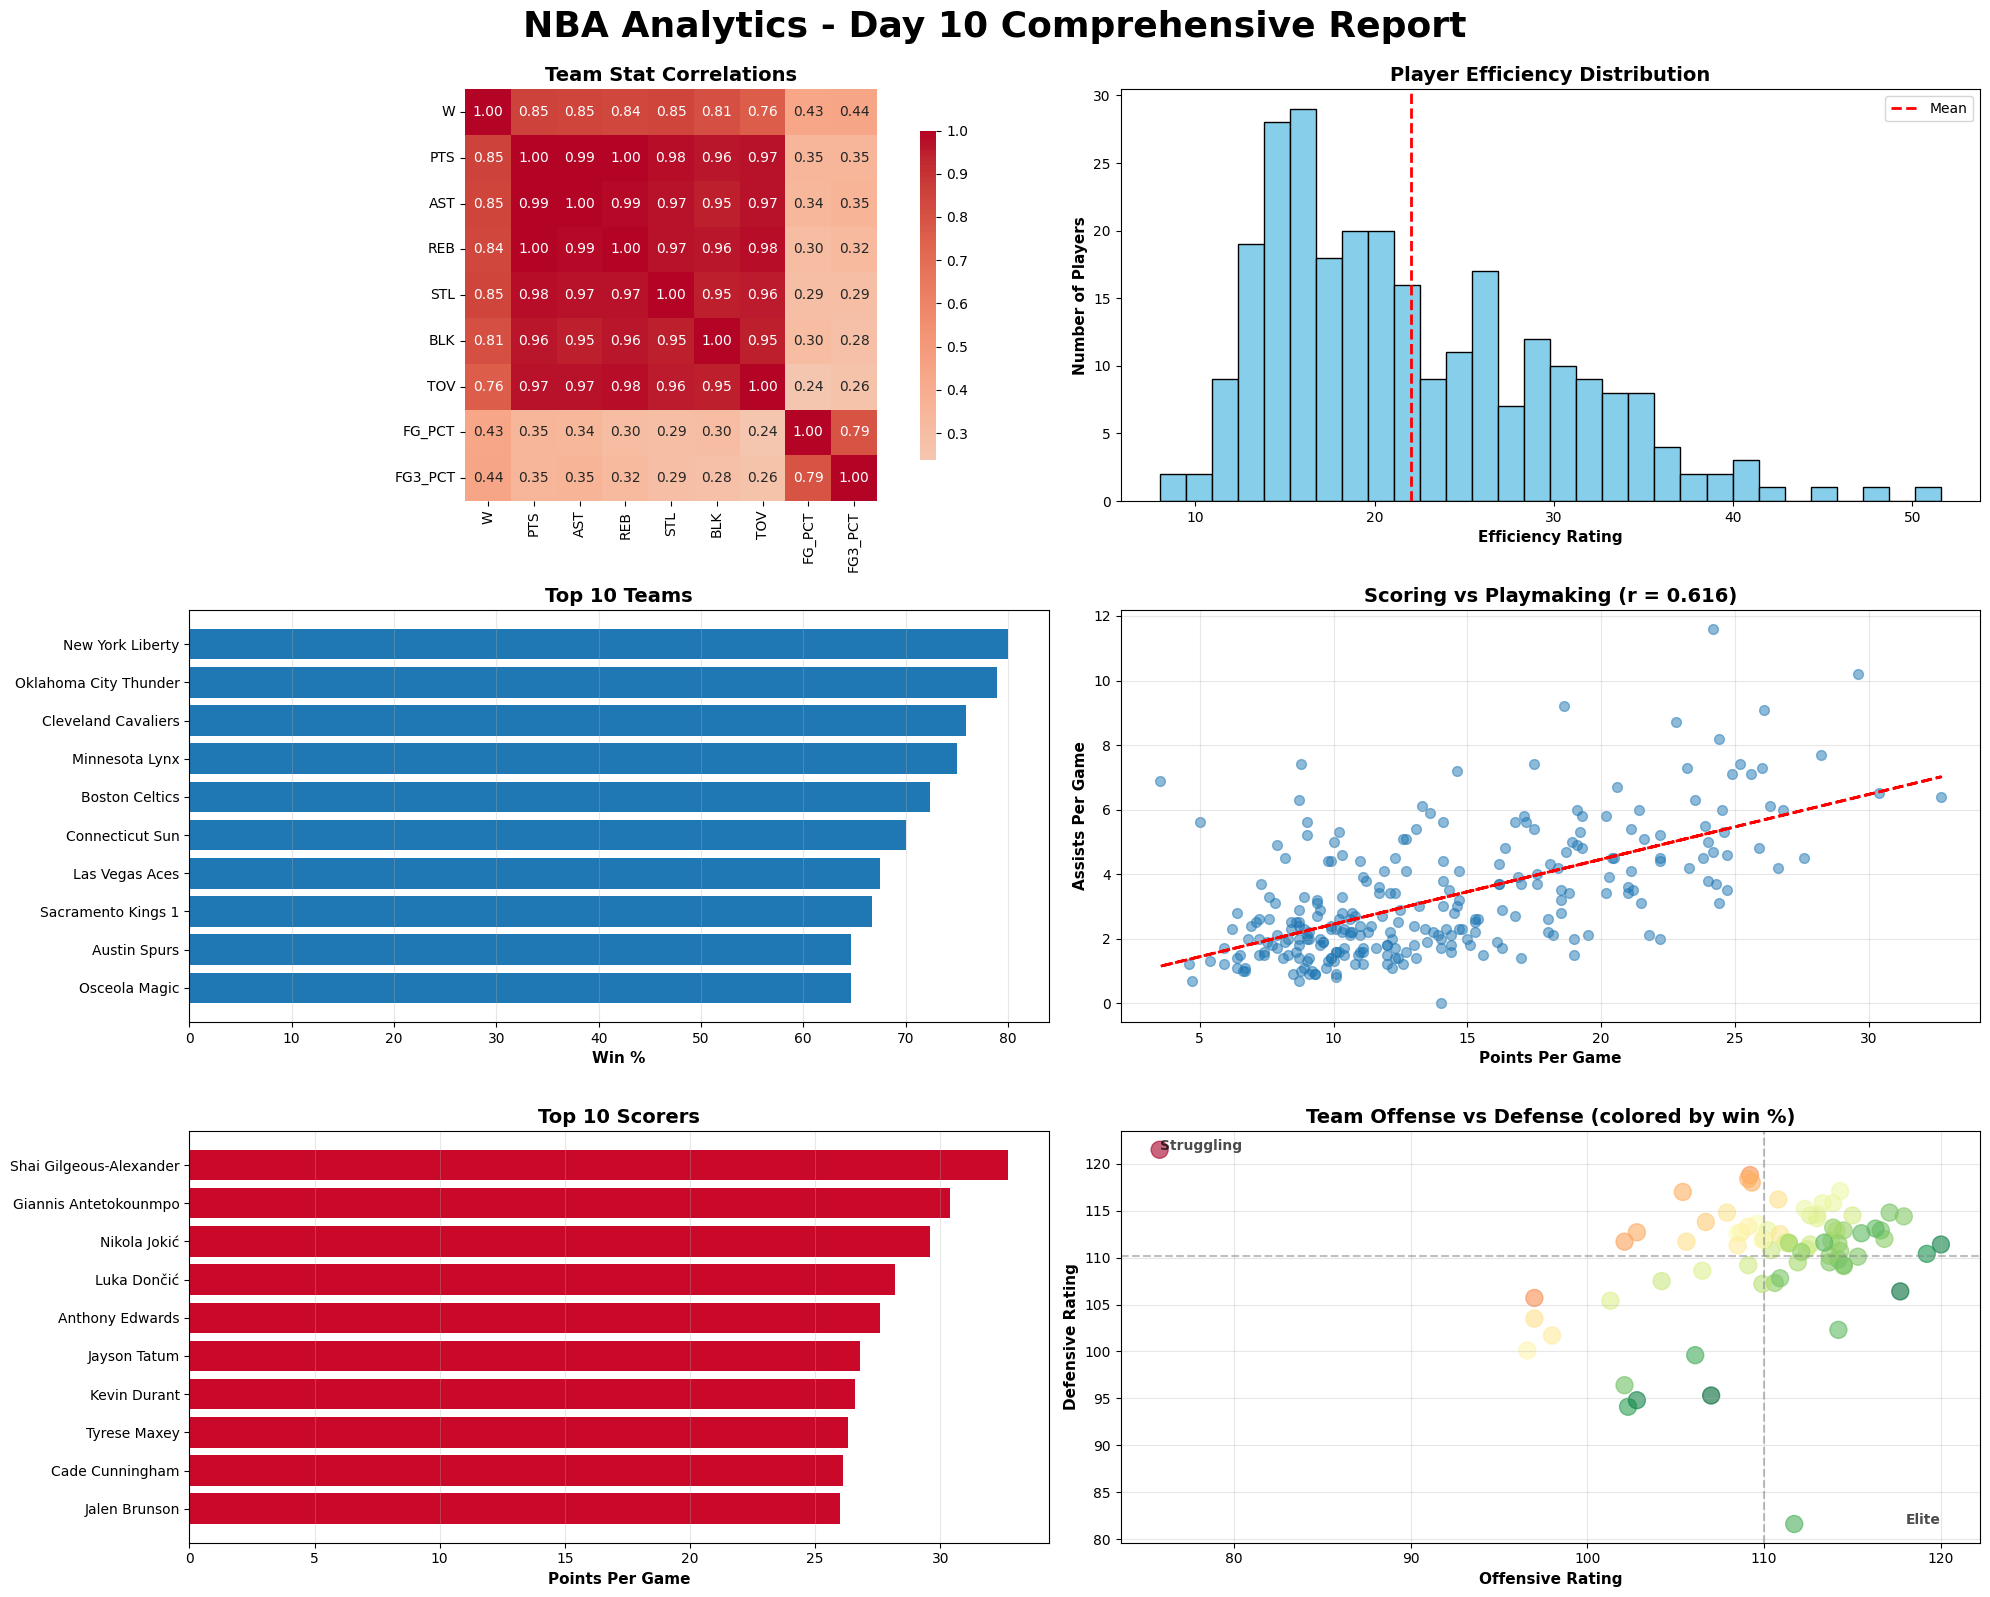

In [33]:
# create dashboard
fig = plt.figure(figsize = (20, 16))

# 6 subplots - 3 rows, 2 columns
ax1 = plt.subplot(3, 2, 1)
ax2 = plt.subplot(3, 2, 2)
ax3 = plt.subplot(3, 2, 3)
ax4 = plt.subplot(3, 2, 4)
ax5 = plt.subplot(3, 2, 5)
ax6 = plt.subplot(3, 2, 6)

plt.suptitle('NBA Analytics - Day 10 Comprehensive Report',
             fontsize = 26, fontweight = 'bold', y = 0.995)

# chart 1 - team correlation heatmap - top corr only
stat_cols = ['W', 'PTS', 'AST', 'REB', 'STL', 'BLK', 'TOV', 'FG_PCT', 'FG3_PCT']
corr_matrix = teams_df[stat_cols].corr()
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm',
            center = 0, square = True, ax = ax1, cbar_kws = {"shrink": 0.8})
ax1.set_title("Team Stat Correlations", fontsize = 14, fontweight = 'bold')

# chart 2 player efficiency distro
players_df['EFFICIENCY'] = (
    players_df['PTS'] + players_df['REB'] + players_df['AST'] +
    players_df['STL'] + players_df['BLK'] - players_df['TOV']
)
ax2.hist(players_df['EFFICIENCY'], bins = 30, color = 'skyblue', edgecolor = 'black')
ax2.axvline(players_df['EFFICIENCY'].mean(), color = 'red',
            linestyle = '--', linewidth = 2, label = 'Mean')
ax2.set_xlabel('Efficiency Rating', fontsize = 11, fontweight = 'bold')
ax2.set_ylabel('Number of Players', fontsize = 11, fontweight = 'bold')
ax2.set_title('Player Efficiency Distribution', fontsize = 14, fontweight = 'bold')
ax2.legend()

# chart 3 top 10 teams by win %
top_teams = teams_df.nlargest(10, 'W_PCT')
ax3.barh(top_teams['TEAM_NAME'], top_teams['W_PCT'] * 100)
ax3.set_xlabel('Win %', fontsize = 11, fontweight = 'bold')
ax3.set_title('Top 10 Teams', fontsize = 14, fontweight = 'bold')
ax3.invert_yaxis()
ax3.grid(axis = 'x', alpha = 0.3)

# chart 4 scoring vs assists correlation
ax4.scatter(players_df['PTS'], players_df['AST'], alpha = 0.5, s = 50)
z = np.polyfit(players_df['PTS'], players_df['AST'], 1)
p = np.poly1d(z)
ax4.plot(players_df['PTS'], p(players_df['PTS']), "r--", linewidth = 2)
corr_pts_ast = players_df['PTS'].corr(players_df['AST'])
ax4.set_xlabel('Points Per Game', fontsize = 11, fontweight = 'bold')
ax4.set_ylabel('Assists Per Game', fontsize = 11, fontweight = 'bold')
ax4.set_title(f"Scoring vs Playmaking (r = {corr_pts_ast:.3f})",
              fontsize = 14, fontweight = 'bold')
ax4.grid(alpha = 0.3)

# chart 5 top scorers
top_scorers = players_df.nlargest(10, 'PTS')
ax5.barh(top_scorers['PLAYER_NAME'], top_scorers['PTS'], color = '#C9082A')
ax5.set_xlabel('Points Per Game', fontsize = 11, fontweight = 'bold')
ax5.set_title('Top 10 Scorers', fontsize = 14, fontweight = 'bold')
ax5.invert_yaxis()
ax5.grid(axis = 'x', alpha = 0.3)

# chart 6 team offense vs defense
ax6.scatter(teams_df['OFF_RATING'], teams_df['DEF_RATING'],
            alpha = 0.6, s = 150, c = teams_df['W_PCT'], cmap = 'RdYlGn')
ax6.axhline(teams_df['DEF_RATING'].mean(), color = 'gray', linestyle = '--', alpha = 0.5)
ax6.axvline(teams_df['OFF_RATING'].mean(), color = 'gray', linestyle = '--', alpha = 0.5)
ax6.set_xlabel("Offensive Rating", fontsize = 11, fontweight = 'bold')
ax6.set_ylabel("Defensive Rating", fontsize = 11, fontweight = 'bold')
ax6.set_title("Team Offense vs Defense (colored by win %)",
              fontsize = 14, fontweight = 'bold')
ax6.grid(alpha= 0.3)
# quadrant labels
ax6.text(teams_df['OFF_RATING'].max(), teams_df['DEF_RATING'].min(),
         'Elite', ha = 'right', fontsize = 10, fontweight = 'bold', alpha = 0.7)
ax6.text(teams_df['OFF_RATING'].min(), teams_df['DEF_RATING'].max(),
         'Struggling', ha = 'left', fontsize = 10, fontweight = 'bold', alpha = 0.7)

plt.tight_layout()
plt.savefig('../visualizations/day10_comprehensive_dashboard.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [35]:
# key insights
print("=" * 60)
print("Day 10 Analysis Findings")
print("=" * 60)

# strongest correlation with winning
win_correlations = teams_df[['W', 'PTS', 'AST', 'REB', 'STL', 'BLK',
                             'TOV', 'FG_PCT', 'FG3_PCT', 'OFF_RATING',
                             'DEF_RATING']].corr()['W'].sort_values(ascending = False)
print("\n1. Stats Most Correlated With Winning:")
for stat, corr in list(win_correlations.items())[1:4]: # skip w
    print(f" {stat}: {corr:.3f}")

# most efficient players
top_efficient = players_df.nlargest(5, "EFFICIENCY")
print("\n2. Most Efficient Players:")
for _, player in top_efficient.iterrows():
    print(f" {player['PLAYER_NAME']}: {player['EFFICIENCY']:.1f}")

# balanced teams - low std in mins , good depth
team_player_merge = players_df.merge(
    teams_df[['TEAM_ID', 'TEAM_NAME', 'W']],
    on = 'TEAM_ID',
    suffixes = ('_player', '_team')
)
team_balance = team_player_merge.groupby('TEAM_NAME').agg({
    'MIN': 'std',
    'W_team': 'first'
}).sort_values('MIN')
print("\n3. Teams With Best Depth (balanced mins):")
for team, data in team_balance.head(5).iterrows():
    print(f" {team}: {data['W_team']} wins, {data['MIN']:.1f} min std dev")

# Three point shooting impact
three_pt_corr = teams_df['FG3_PCT'].corr(teams_df['W'])
print(f"\n4. Three Point Shooting Impact:")
print(f" Correlation with wins: {three_pt_corr:.3f}")
best_3pt = teams_df.nlargest(3, 'FG3_PCT')[['TEAM_NAME', 'FG3_PCT', 'W']]
print(" Best 3PT Shooting Teams:")
for _, team in best_3pt.iterrows():
    print(f" {team['TEAM_NAME']}: {team['FG3_PCT'] * 100:.1f}%, {team['W']} wins")

# off vs def balance
offense_corr = teams_df['OFF_RATING'].corr(teams_df['W'])
defense_corr = teams_df['DEF_RATING'].corr(teams_df['W'])
print("\n5. Offensive vs Defensive:")
print(f" Offensive Rating Correlation: {offense_corr:.3f}")
print(f" Defensive Rating Correlation: {defense_corr:.3f}")
if abs(offense_corr) > abs(defense_corr):
    print("Offense mattered more this season")
else:
    print("Defense mattered more this season")

print("\n" + "=" * 60)

Day 10 Analysis Findings

1. Stats Most Correlated With Winning:
 PTS: 0.855
 STL: 0.849
 AST: 0.848

2. Most Efficient Players:
 Nikola Jokić: 51.6
 Giannis Antetokounmpo: 47.8
 Shai Gilgeous-Alexander: 44.4
 Luka Dončić: 42.7
 Anthony Davis: 41.0

3. Teams With Best Depth (balanced mins):
 Indiana Pacers: 51.0 wins, 3.1 min std dev
 Houston Rockets: 54.0 wins, 3.2 min std dev
 Brooklyn Nets: 29.0 wins, 3.5 min std dev
 Memphis Grizzlies: 54.0 wins, 3.8 min std dev
 Washington Wizards: 21.0 wins, 3.9 min std dev

4. Three Point Shooting Impact:
 Correlation with wins: 0.441
 Best 3PT Shooting Teams:
 Capital City Go-Go: 38.7%, 20 wins
 Wisconsin Herd: 38.3%, 19 wins
 Milwaukee Bucks: 38.2%, 48 wins

5. Offensive vs Defensive:
 Offensive Rating Correlation: 0.552
 Defensive Rating Correlation: 0.092
Offense mattered more this season



In [36]:
# summary CSV file
teams_df[['TEAM_NAME', 'W', 'L', 'W_PCT', 'PTS', 'AST', 'REB',
          'OFF_RATING', 'DEF_RATING']].to_csv('../data/team_summary.csv', index = False)

players_df[['PLAYER_NAME', 'TEAM_ABBREVIATION', 'PTS', 'REB', 'AST',
            'EFFICIENCY']].to_csv('../data/payer_summary.csv', index = False)

print("exported to /data folder")

exported to /data folder
